In [1]:
import tradingeconomics as te
import pandas as pd
from datetime import datetime
import matplotlib.dates as md
import matplotlib.pyplot as plt

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:
raw_data = te.fetchMarkets(symbol=['XAUUSD:CUR', 'XPTUSD:CUR', 'XAGUSD:CUR'], initDate='2020-01-01', output_type='df')

In [4]:
gold = raw_data.loc[raw_data['symbol'] == 'XAUUSD:CUR']
platinum = raw_data.loc[raw_data['symbol'] == 'XPTUSD:CUR']
silver = raw_data.loc[raw_data['symbol'] == 'XAGUSD:CUR']

gld = gold[['close']].rename(columns={'close': 'Gold'})
gld.index.name = 'Date'
pla = platinum[['close']].rename(columns={'close': 'Platinum'})
pla.index.name = 'Date'
slv = silver[['close']].rename(columns={'close': 'Silver'})
slv.index.name = 'Date'

df = pd.merge(pd.merge(gld,pla, on='Date'),slv, on='Date')

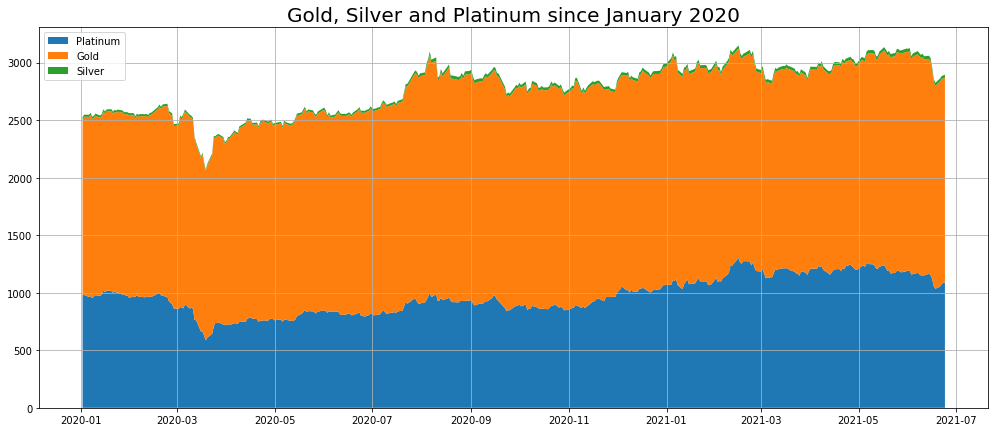

In [5]:

plt.subplots(figsize=(17, 7))
labels = ['Platinum','Gold','Silver']
plt.stackplot(df.index.tolist(),df['Platinum'].values.tolist(),df['Gold'].values.tolist(),df['Silver'].values.tolist(), labels= labels)
plt.legend(loc='upper left')
plt.title("Gold, Silver and Platinum since January 2020", size=20)
plt.grid(True)
plt.show()
